In [14]:
import numpy as np

from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers

import matplotlib.pyplot as plt

In [1]:
import os, shutil

base_dir = r'E:\hand_gesture_dataset\splited'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [2]:
# due to a bug when trying to use tensorflow-gpu==2.0.0 and cudnn_v_7.6.1
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [17]:
img_rows = 150
img_cols = 150
epochs = 50
batch_size = 20
num_of_train_samples = 1795
num_of_test_samples = 360

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (img_rows, img_cols),
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                        target_size = (img_rows, img_cols),
                                                        batch_size = batch_size,
                                                        class_mode = 'categorical',
                                                        shuffle = False)

Using TensorFlow backend.


Found 1795 images belonging to 36 classes.
Found 360 images belonging to 36 classes.


In [6]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                        target_size = (img_rows, img_cols),
                                                        batch_size = 20,
                                                        class_mode = 'categorical',
                                                        shuffle = False)

Found 360 images belonging to 36 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

In [7]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(36, activation = 'softmax'))

In [8]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.RMSprop(lr=1e-4),
              metrics = ['acc'])

In [18]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = num_of_train_samples // batch_size,
                              epochs = epochs,
                              validation_data = validation_generator,
                              validation_steps = num_of_test_samples // batch_size)


Epoch 1/50
89/89 [==============================] - 8s 88ms/step - loss: 0.0079 - acc: 0.9983 - val_loss: 0.0010 - val_acc: 0.9806
Epoch 2/50
89/89 [==============================] - 8s 89ms/step - loss: 0.0037 - acc: 0.9983 - val_loss: 0.0034 - val_acc: 0.9750
Epoch 3/50
89/89 [==============================] - 8s 94ms/step - loss: 0.0063 - acc: 0.9983 - val_loss: 0.0015 - val_acc: 0.9778
Epoch 4/50
89/89 [==============================] - 8s 94ms/step - loss: 0.0017 - acc: 0.9994 - val_loss: 1.2055e-04 - val_acc: 0.9722
Epoch 5/50
89/89 [==============================] - 8s 92ms/step - loss: 0.0039 - acc: 0.9983 - val_loss: 0.0012 - val_acc: 0.9750
Epoch 6/50
89/89 [==============================] - 8s 91ms/step - loss: 0.0056 - acc: 0.9994 - val_loss: 6.4271e-04 - val_acc: 0.9806
Epoch 7/50
89/89 [==============================] - 8s 91ms/step - loss: 0.0013 - acc: 0.9994 - val_loss: 0.0011 - val_acc: 0.9750
Epoch 8/50
89/89 [==============================] - 9s 96ms/step - loss: 0.

KeyboardInterrupt: 

In [11]:
model.save('models//CNN.h5')

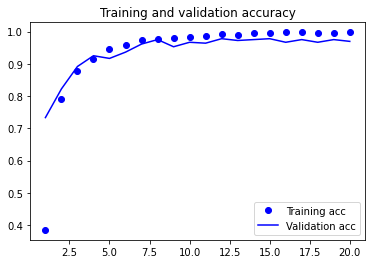

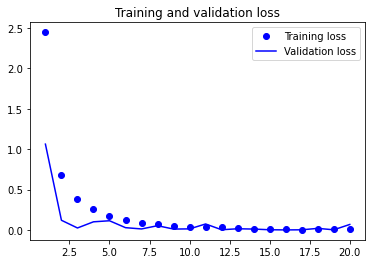

In [12]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# import numpy as np
# print(np.unique(test_generator.classes))
# for data_batch, labels_batch in test_generator:
#     for image, label in zip(data_batch, labels_batch):
#         true_label = np.argmax(label)
#         pred = np.argmax(model.predict(np.array([image])))
#         print(true_label)
#         print(pred)
#         print()
#         prbint(true_label + " : " + pred)
#     print('data batch shape:', data_batch.shape)
#     print('labels batch shape:', labels_batch.shape)

0.9694444444444444
Classification report
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       1.00      1.00      1.00        10
           2       0.91      1.00      0.95        10
           3       1.00      1.00      1.00        10
           4       1.00      0.90      0.95        10
           5       0.91      1.00      0.95        10
           6       0.82      0.90      0.86        10
           7       1.00      0.90      0.95        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
           A       1.00      1.00      1.00        10
           B       1.00      1.00      1.00        10
           C       1.00      1.00      1.00        10
           D       1.00      1.00      1.00        10
           E       1.00      1.00      1.00        10
           F       1.00      1.00      1.00        10
           G       1.00      1.00      1

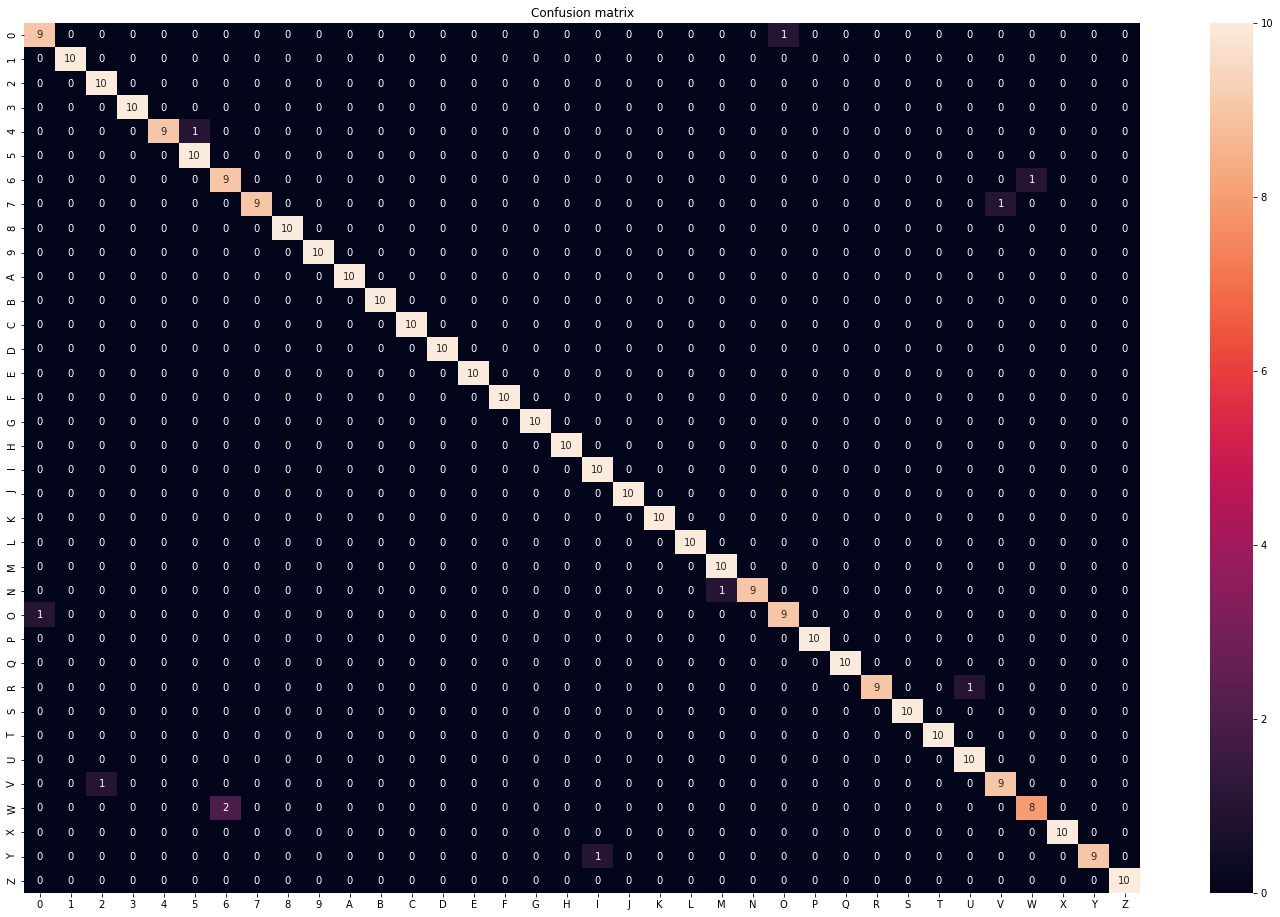

In [15]:
# results on validation data
from utils.report import report

y_pred_validation = model.predict_generator(validation_generator, num_of_test_samples // batch_size)
y_pred_validation = np.argmax(y_pred_validation, axis=1)

report(validation_generator.classes, y_pred_validation)

0.9527777777777777
Classification report
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10
           2       0.90      0.90      0.90        10
           3       1.00      1.00      1.00        10
           4       0.91      1.00      0.95        10
           5       1.00      0.90      0.95        10
           6       0.64      0.90      0.75        10
           7       1.00      1.00      1.00        10
           8       1.00      1.00      1.00        10
           9       1.00      1.00      1.00        10
           A       1.00      1.00      1.00        10
           B       1.00      1.00      1.00        10
           C       1.00      1.00      1.00        10
           D       0.83      1.00      0.91        10
           E       1.00      1.00      1.00        10
           F       1.00      1.00      1.00        10
           G       1.00      1.00      1

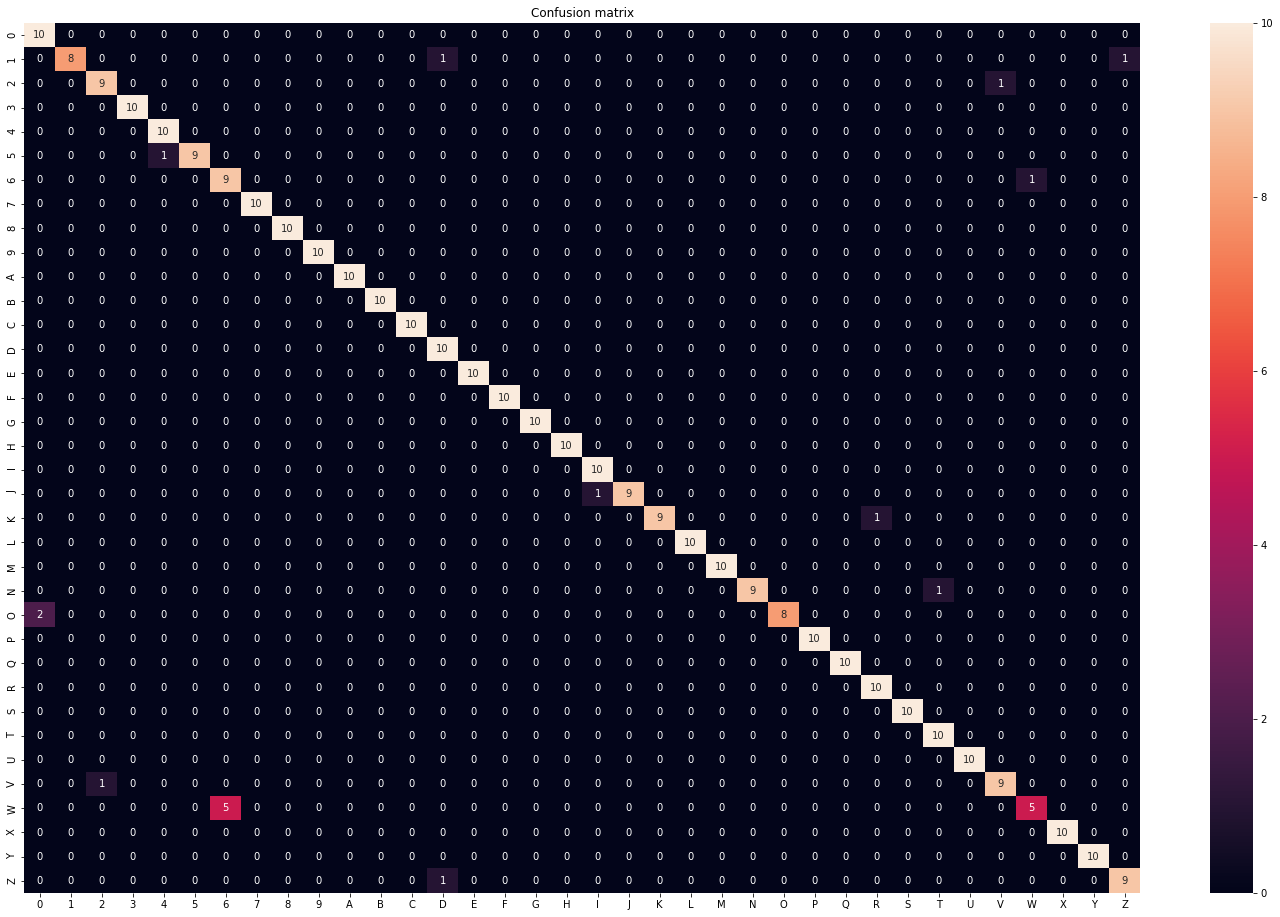

In [16]:
# results on test data
from utils.report import report

y_pred_test = model.predict_generator(test_generator, num_of_test_samples // batch_size)
y_pred_test = np.argmax(y_pred_test, axis=1)

report(test_generator.classes, y_pred_test)

In [ ]:
# from keras.models import load_model
# model = load_model('models//CNN.h5') 

#Confution Matrix and Classification Report
import sys
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

np.set_printoptions(threshold=sys.maxsize)

target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H',
                'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size)
y_pred = np.argmax(Y_pred, axis=1)

conf_matrix = confusion_matrix(validation_generator.classes, y_pred)
df_cm = pd.DataFrame(conf_matrix, index = target_names, columns = target_names)

plt.figure(figsize = (25, 16))
plt.title("Confusion matrix on validation data")
sn.heatmap(df_cm, annot=True)

print('Classification report on validation data')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

In [ ]:
# results on test data
Y_pred = model.predict_generator(test_generator, num_of_test_samples // batch_size)
y_pred = np.argmax(Y_pred, axis=1)

conf_matrix = confusion_matrix(test_generator.classes, y_pred)
df_cm = pd.DataFrame(conf_matrix, index = target_names, columns = target_names)

plt.figure(figsize = (25, 16))
plt.title("Confusion matrix on test data")
sn.heatmap(df_cm, annot=True)

print('Classification report on test data')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))